In [43]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from stacking import Stacking
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import StackingRegressor

In [44]:
data = pd.read_csv("data.csv")
data

,X,y
0,0.093949,0.639861
1,0.101092,0.100920
2,0.195939,0.194688
3,0.301127,0.296597
4,0.355180,0.347759
...,...,...
75,4.818314,-0.043969
76,4.882297,-0.985600
77,4.883805,-0.985344
78,4.893092,-0.983718


In [45]:
X = data.drop(["y"],axis=1)
y = data["y"] 

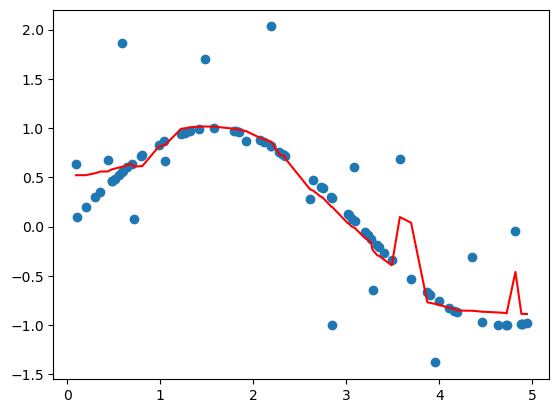

In [46]:
plt.scatter(X,y)
model = Stacking(base_models=[LinearRegression(),DecisionTreeRegressor(),AdaBoostRegressor()],meta_models=SVR())
model.fit(X,y)
y_predict = model.predict(X)
plt.plot(X,y_predict,c="r")

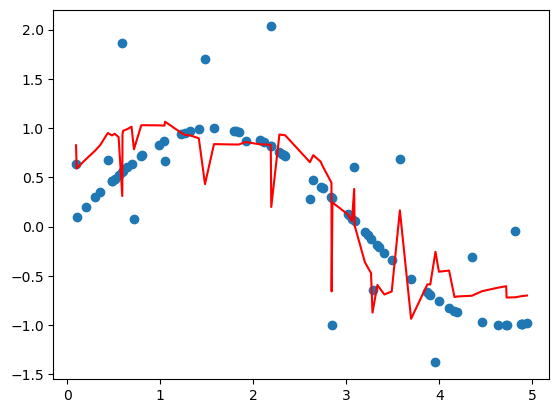

In [47]:
plt.scatter(X,y)
model = StackingRegressor(
    estimators=[("lr",LinearRegression()),("Ad",AdaBoostRegressor()),("DT",DecisionTreeRegressor())],
    final_estimator=SVR()
)
model.fit(X,y)
y_predict = model.predict(X)
plt.plot(X,y_predict,c="r")